# **📊 Part 1: Data Loading & Exploratory Data Analysis (EDA)**

# Table of Contents

1. [Setup & Data Loading](#setup--data-loading)
2. [Initial Data Inspection](#initial-data-inspection)
3. [Univariate Analysis](#univariate-analysis)
4. [Bivariate Analysis](#bivariate-analysis)
5. [Multivariate Analysis](#multivariate-analysis)
6. [Target Variable Analysis](#target-variable-analysis)


# **1. Setup & Data Loading**

**📚 Import Required Libraries**

💡 **Explanation**

- **pandas** — For data manipulation and analysis
- **numpy** — For numerical operations
- **matplotlib** & **seaborn** — For static visualizations
- **plotly** — For interactive visualizations
- **scipy.stats** — For statistical analysis


In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Statistics
from scipy import stats

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# **📂 Load the Dataset**
💡 **Explanation**

- We load the CSV file into a **pandas DataFrame**
- We check the **dimensions** (rows × columns)


In [2]:
# Load the dataset
df = pd.read_csv('telco_churn_enhanced_raw.csv')

print(f"✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape[0]} rows × {df.shape[1]} columns")

✅ Dataset loaded successfully!
📊 Shape: 7193 rows × 36 columns


# **2. Initial Data Inspection**

**🔍 Quick Overview**
💡 **What to look for:**

- Data structure and format
- Column names
- Sample values
- Initial data quality issues


In [3]:
# Display first 5 rows
print("=" * 80)
print("FIRST 5 ROWS")
print("=" * 80)
print(df.head())

FIRST 5 ROWS
  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   5939-KIO  Female              0     Yes         No      30          Yes   
1   3483-POO  Female              0     Yes         No      53          Yes   
2   7658-HQI    Male              0      No        Yes      15          Yes   
3   1648-POO    Male              0     Yes         No      38          Yes   
4   2478-VHV  Female              0     Yes         No      57          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0           Yes             DSL            Yes           No               No   
1            No             DSL             No           No               No   
2           Yes     Fiber optic             No          Yes               No   
3            No             DSL             No           No               No   
4            No             DSL            Yes          Yes               No   

  TechSupport StreamingTV Strea

**📋 Dataset Information**

💡 **What this shows:**

- Total number of entries
- Column data types
- Non-null counts
- Memory usage


In [4]:
print("\n" + "=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
df.info()


DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7193 entries, 0 to 7192
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7193 non-null   object 
 1   gender                     7193 non-null   object 
 2   SeniorCitizen              7193 non-null   int64  
 3   Partner                    7193 non-null   object 
 4   Dependents                 7193 non-null   object 
 5   tenure                     7193 non-null   int64  
 6   PhoneService               7193 non-null   object 
 7   MultipleLines              7193 non-null   object 
 8   InternetService            7152 non-null   object 
 9   OnlineSecurity             7193 non-null   object 
 10  OnlineBackup               7193 non-null   object 
 11  DeviceProtection           7193 non-null   object 
 12  TechSupport                7193 non-null   object 
 13  StreamingTV                

# **📊 Statistical Summary**
💡 **What to analyze:**

- **Mean vs Median** — If very different, data may be skewed
- **Min/Max** — Check for unrealistic values
- **Std** — Shows data spread
- **25%, 50%, 75%** — Quartiles show distribution


In [5]:
print("\n" + "=" * 80)
print("STATISTICAL SUMMARY - NUMERICAL FEATURES")
print("=" * 80)
print(df.describe())


STATISTICAL SUMMARY - NUMERICAL FEATURES
       SeniorCitizen       tenure  NumServiceTickets  NumTechTickets  \
count    7193.000000  7193.000000        7193.000000     7193.000000   
mean        0.160156    36.535660           3.373975        2.415543   
std         0.366776    21.803607           2.349177        1.811276   
min         0.000000     0.000000           0.000000        0.000000   
25%         0.000000    18.000000           2.000000        1.000000   
50%         0.000000    37.000000           3.000000        2.000000   
75%         0.000000    55.000000           5.000000        3.000000   
max         1.000000   144.000000          15.000000       12.000000   

       NumAdminTickets  CustomerSatisfactionScore  DownloadSpeed  UploadSpeed  \
count      7193.000000                7193.000000    7193.000000  7193.000000   
mean          0.499096                   2.771444     128.492560    25.857977   
std           0.707131                   1.319943     158.033491  

**🔢 Check Data Types**

💡 **Common Issues to Identify:**

- Numerical data stored as **strings** (e.g., `'29.85'` instead of `29.85`)
- **Dates** stored as strings
- **Categorical** data stored as objects


In [6]:
print("\n" + "=" * 80)
print("DATA TYPES")
print("=" * 80)
dtype_df = pd.DataFrame({
    'Column': df.dtypes.index,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.count().values,
    'Null Count': df.isnull().sum().values
})
print(dtype_df)


DATA TYPES
                       Column Data Type  Non-Null Count  Null Count
0                  customerID    object            7193           0
1                      gender    object            7193           0
2               SeniorCitizen     int64            7193           0
3                     Partner    object            7193           0
4                  Dependents    object            7193           0
5                      tenure     int64            7193           0
6                PhoneService    object            7193           0
7               MultipleLines    object            7193           0
8             InternetService    object            7152          41
9              OnlineSecurity    object            7193           0
10               OnlineBackup    object            7193           0
11           DeviceProtection    object            7193           0
12                TechSupport    object            7193           0
13                StreamingTV    obj

 **❓ Check for Missing Values**

 💡 **Interpretation:**

- **< 5%** — Usually safe to remove rows or impute
- **5–20%** — Needs a careful imputation strategy
- **> 20%** — Consider removing the column or apply domain-specific imputation



MISSING VALUES ANALYSIS
         Column  Missing_Count  Percentage
   TotalCharges            200        2.78
InternetService             41        0.57
       Contract             40        0.56
  PaymentMethod             20        0.28


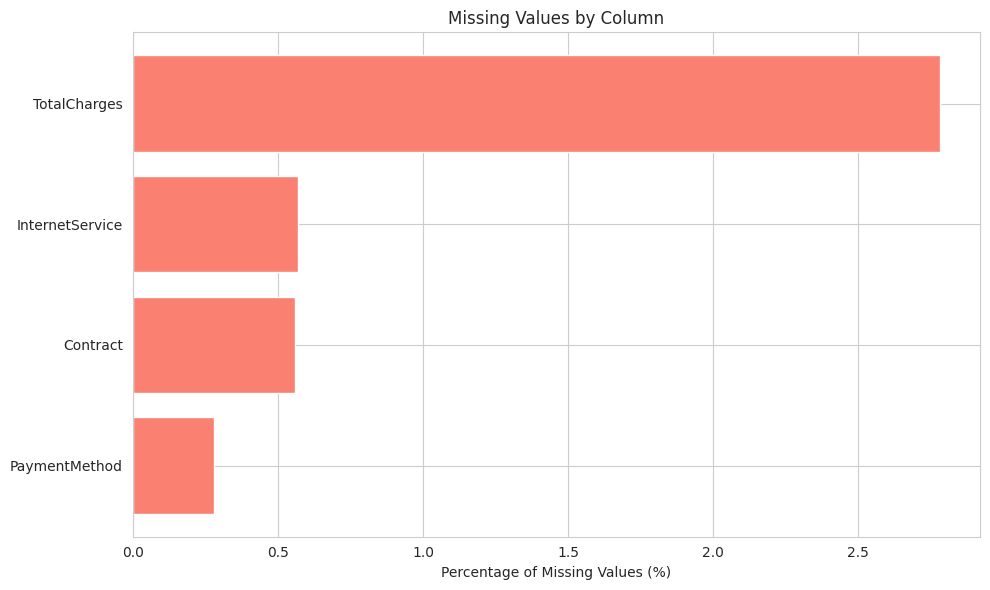


✅ Missing values visualization saved as 'missing_values.png'


In [7]:
print("\n" + "=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})

# Filter only columns with missing values
missing_data = missing_data[missing_data['Missing_Count'] > 0]
missing_data = missing_data.sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print(missing_data.to_string(index=False))

    # Visualize missing values
    plt.figure(figsize=(10, 6))
    plt.barh(missing_data['Column'], missing_data['Percentage'], color='salmon')
    plt.xlabel('Percentage of Missing Values (%)')
    plt.title('Missing Values by Column')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✅ Missing values visualization saved as 'missing_values.png'")
else:
    print("✅ No missing values found!")

**🔁 Check for Duplicates**

💡 **Actions:**

- **Exact duplicates** — Remove using `drop_duplicates()`
- **Duplicate IDs** — Investigate which record is correct


In [8]:
print("\n" + "=" * 80)
print("DUPLICATE RECORDS ANALYSIS")
print("=" * 80)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows}")

# Check for duplicate customer IDs
if 'customerID' in df.columns:
    duplicate_ids = df['customerID'].duplicated().sum()
    print(f"Duplicate customer IDs: {duplicate_ids}")

    # Show sample duplicates
    if duplicate_ids > 0:
        print("\nSample duplicate customer IDs:")
        dup_ids = df[df['customerID'].duplicated(keep=False)]['customerID'].unique()[:5]
        for cid in dup_ids:
            print(f"\nCustomer ID: {cid}")
            print(df[df['customerID'] == cid][['customerID', 'tenure', 'MonthlyCharges', 'Churn']])


DUPLICATE RECORDS ANALYSIS
Total duplicate rows: 0
Duplicate customer IDs: 438

Sample duplicate customer IDs:

Customer ID: 9320-GNV
    customerID  tenure MonthlyCharges Churn
7     9320-GNV      65          54.05    No
878   9320-GNV      65          54.05    No

Customer ID: 8018-CDS
     customerID  tenure MonthlyCharges Churn
8      8018-CDS      44          80.98   Yes
5595   8018-CDS      64           43.0    No

Customer ID: 2494-GNV
     customerID  tenure MonthlyCharges Churn
10     2494-GNV       3          62.19   Yes
5892   2494-GNV      37          74.59    No
7134   2494-GNV      33          43.53    No

Customer ID: 8062-CDS
     customerID  tenure MonthlyCharges Churn
12     8062-CDS      59          69.53   Yes
1366   8062-CDS      59          69.53   Yes

Customer ID: 2659-CDS
    customerID  tenure MonthlyCharges Churn
24    2659-CDS       0          44.53   Yes
763   2659-CDS      35          33.13   Yes


# **3. Univariate Analysis**

# **📈 Numerical Features Analysis**

💡 **Interpretation**

### **Skewness**
- Close to **0** — Normally distributed
- **> 1** or **< -1** — Highly skewed

### **Kurtosis**
- Close to **0** — Normal distribution
- **> 0** — Heavy tails (outliers present)
- **< 0** — Light tails


In [9]:
print("\n" + "=" * 80)
print("UNIVARIATE ANALYSIS - NUMERICAL FEATURES")
print("=" * 80)

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}\n")

# Analyze each numerical column
for col in numerical_cols[:5]:  # First 5 numerical columns
    print(f"\n{'='*60}")
    print(f"Feature: {col}")
    print(f"{'='*60}")

    # Basic statistics
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Std Dev: {df[col].std():.2f}")
    print(f"Min: {df[col].min():.2f}")
    print(f"Max: {df[col].max():.2f}")
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurtosis():.2f}")


UNIVARIATE ANALYSIS - NUMERICAL FEATURES
Numerical columns: ['SeniorCitizen', 'tenure', 'NumServiceTickets', 'NumTechTickets', 'NumAdminTickets', 'CustomerSatisfactionScore', 'DownloadSpeed', 'UploadSpeed', 'ContractRenewals', 'AccountAgeYears', 'TotalServicesUsed', 'AvgChargePerService', 'PaymentDelay']


Feature: SeniorCitizen
Mean: 0.16
Median: 0.00
Std Dev: 0.37
Min: 0.00
Max: 1.00
Skewness: 1.85
Kurtosis: 1.44

Feature: tenure
Mean: 36.54
Median: 37.00
Std Dev: 21.80
Min: 0.00
Max: 144.00
Skewness: 0.16
Kurtosis: -0.43

Feature: NumServiceTickets
Mean: 3.37
Median: 3.00
Std Dev: 2.35
Min: 0.00
Max: 15.00
Skewness: 0.80
Kurtosis: 0.42

Feature: NumTechTickets
Mean: 2.42
Median: 2.00
Std Dev: 1.81
Min: 0.00
Max: 12.00
Skewness: 0.83
Kurtosis: 0.53

Feature: NumAdminTickets
Mean: 0.50
Median: 0.00
Std Dev: 0.71
Min: 0.00
Max: 5.00
Skewness: 1.45
Kurtosis: 2.31


# **📊 Distribution Plots - Numerical Features**

💡 **What to look for:**

- **Normal distribution** — Bell-shaped curve
- **Skewed distribution** — Long tail on one side
- **Bimodal** — Two peaks (may indicate different groups)
- **Outliers** — Values far from the main distribution


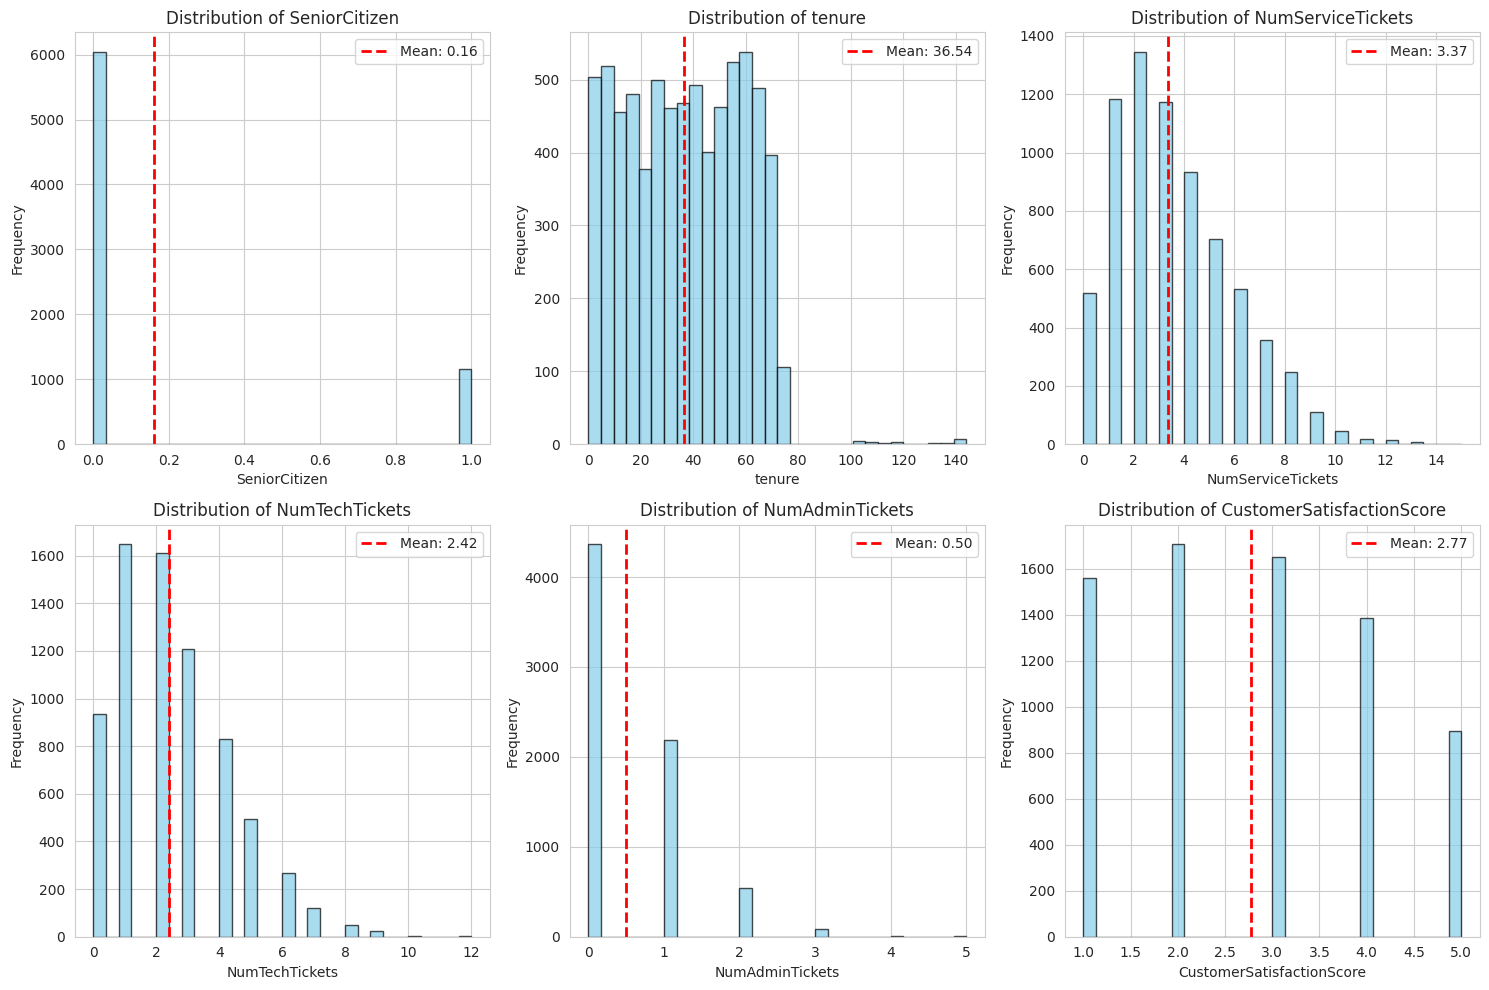

✅ Numerical distributions saved as 'numerical_distributions.png'


In [10]:
# Create distribution plots for numerical features
num_cols_to_plot = numerical_cols[:6]  # First 6 numerical columns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(num_cols_to_plot):
    # Histogram with KDE
    df[col].hist(bins=30, ax=axes[idx], color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

    # Add mean line
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--',
                      linewidth=2, label=f'Mean: {df[col].mean():.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Numerical distributions saved as 'numerical_distributions.png'")

# **📊 Box Plots - Detect Outliers**

💡 **Box Plot Elements:**

- **Box** — Interquartile Range (IQR) = 25th to 75th percentile
- **Line in box** — Median
- **Whiskers** — Extend to 1.5 × IQR
- **Points beyond whiskers** — Potential outliers


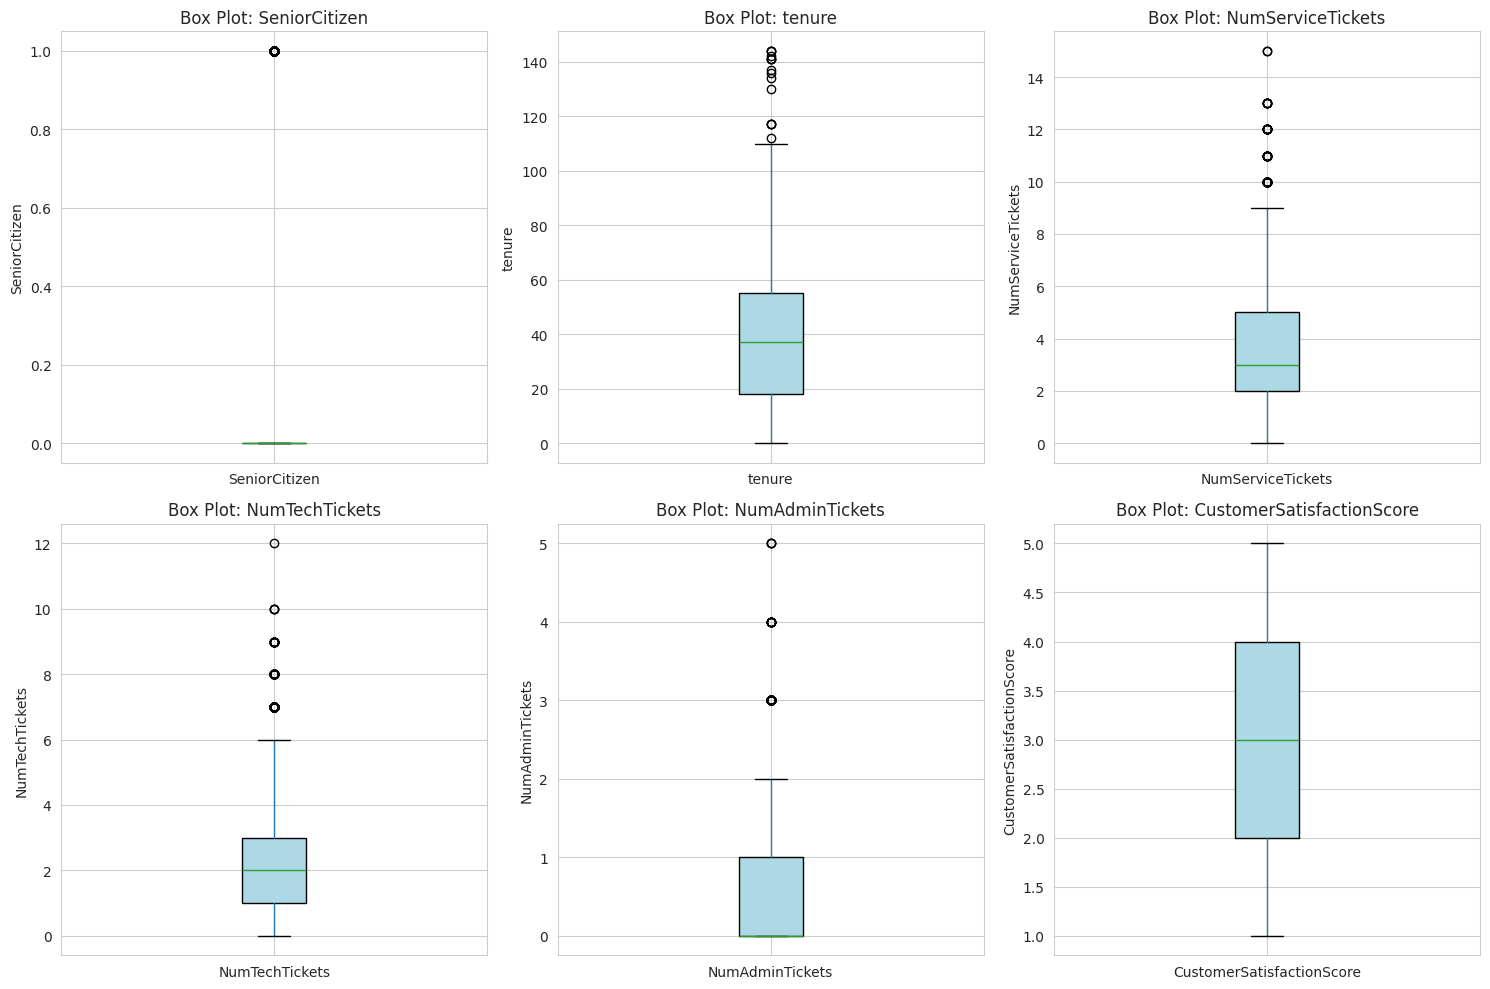

✅ Box plots saved as 'numerical_boxplots.png'


In [11]:
# Box plots to detect outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(num_cols_to_plot):
    df.boxplot(column=col, ax=axes[idx], patch_artist=True,
               boxprops=dict(facecolor='lightblue'))
    axes[idx].set_title(f'Box Plot: {col}')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.savefig('numerical_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Box plots saved as 'numerical_boxplots.png'")

# **📊 Categorical Features Analysis**
💡 **What to note:**

- **High cardinality** (many unique values) — May need special encoding
- **Imbalanced categories** — Some categories are very rare
- **Missing represented as a category** — e.g., `"No internet service"`


In [12]:
print("\n" + "=" * 80)
print("UNIVARIATE ANALYSIS - CATEGORICAL FEATURES")
print("=" * 80)

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}\n")

# Analyze each categorical column
for col in categorical_cols[:5]:  # First 5 categorical columns
    print(f"\n{'='*60}")
    print(f"Feature: {col}")
    print(f"{'='*60}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"\nValue counts:")
    print(df[col].value_counts())
    print(f"\nPercentage distribution:")
    print((df[col].value_counts() / len(df) * 100).round(2))


UNIVARIATE ANALYSIS - CATEGORICAL FEATURES
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'SignupDate', 'LastContactDate', 'City', 'Region']


Feature: customerID
Unique values: 6755

Value counts:
customerID
1653-CDS    6
1606-CFO    3
2875-VHV    3
9525-OKO    3
8593-CFO    3
           ..
7521-HQI    1
3161-GNV    1
8320-OKO    1
1150-POO    1
9898-CDS    1
Name: count, Length: 6755, dtype: int64

Percentage distribution:
customerID
1653-CDS    0.08
1606-CFO    0.04
2875-VHV    0.04
9525-OKO    0.04
8593-CFO    0.04
            ... 
7521-HQI    0.01
3161-GNV    0.01
8320-OKO    0.01
1150-POO    0.01
9898-CDS    0.01
Name: count, Length: 6755, dtype: float64

Feature: gender
Unique values: 2

Value counts:
gender
Mal

# **📊 Bar Charts - Categorical Features**

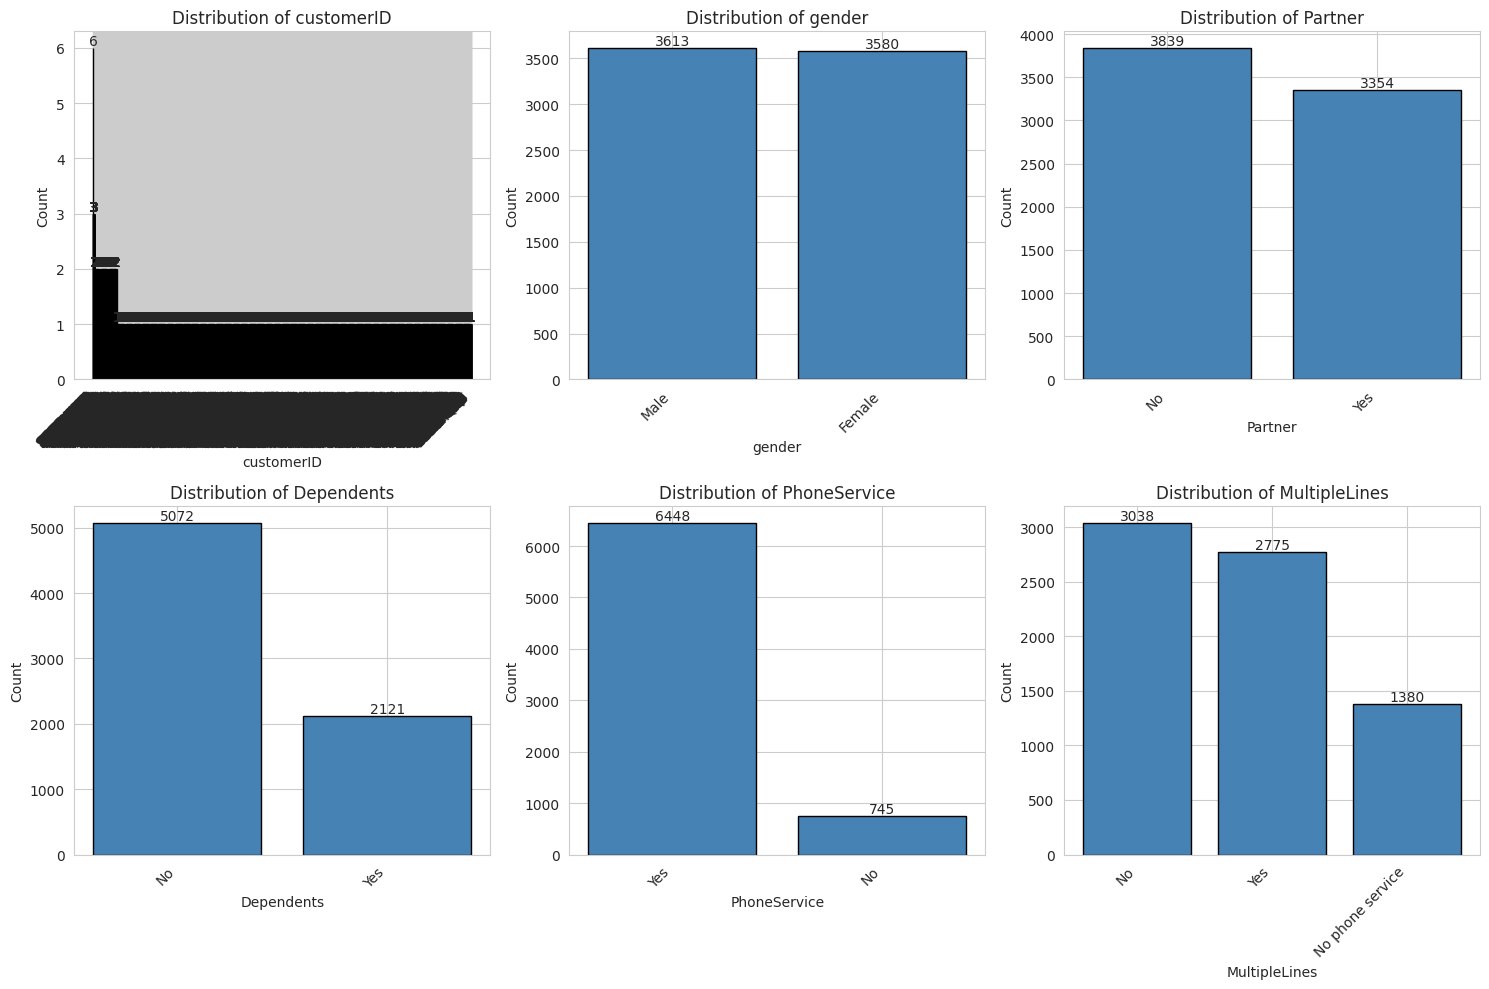

✅ Categorical distributions saved as 'categorical_distributions.png'


In [13]:
# Create bar charts for categorical features
cat_cols_to_plot = categorical_cols[:6]  # First 6 categorical columns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(cat_cols_to_plot):
    # Count plot
    value_counts = df[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values,
                  color='steelblue', edgecolor='black')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')

    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Categorical distributions saved as 'categorical_distributions.png'")

# **4. Bivariate Analysis**

**🔗 Correlation Matrix - Numerical Features**

💡 **Correlation Interpretation:**

- **+1** — Perfect positive correlation
- **0** — No correlation
- **-1** — Perfect negative correlation
- **> 0.7** or **< -0.7** — Strong correlation
- **0.3 to 0.7** — Moderate correlation
- **< 0.3** — Weak correlation



BIVARIATE ANALYSIS - CORRELATION MATRIX
Correlation Matrix:
                           SeniorCitizen    tenure  NumServiceTickets  \
SeniorCitizen                   1.000000 -0.001966           0.043116   
tenure                         -0.001966  1.000000          -0.040713   
NumServiceTickets               0.043116 -0.040713           1.000000   
NumTechTickets                  0.045689 -0.010862           0.339330   
NumAdminTickets                 0.003775  0.015818           0.017948   
CustomerSatisfactionScore      -0.045868  0.029479          -0.419769   
DownloadSpeed                   0.015831 -0.005811           0.068778   
UploadSpeed                     0.013210  0.001228           0.061945   
ContractRenewals               -0.008507 -0.005170          -0.241878   
AccountAgeYears                -0.001966  1.000000          -0.040713   
TotalServicesUsed               0.004902 -0.002822           0.028186   
AvgChargePerService             0.003580  0.013461          -0.

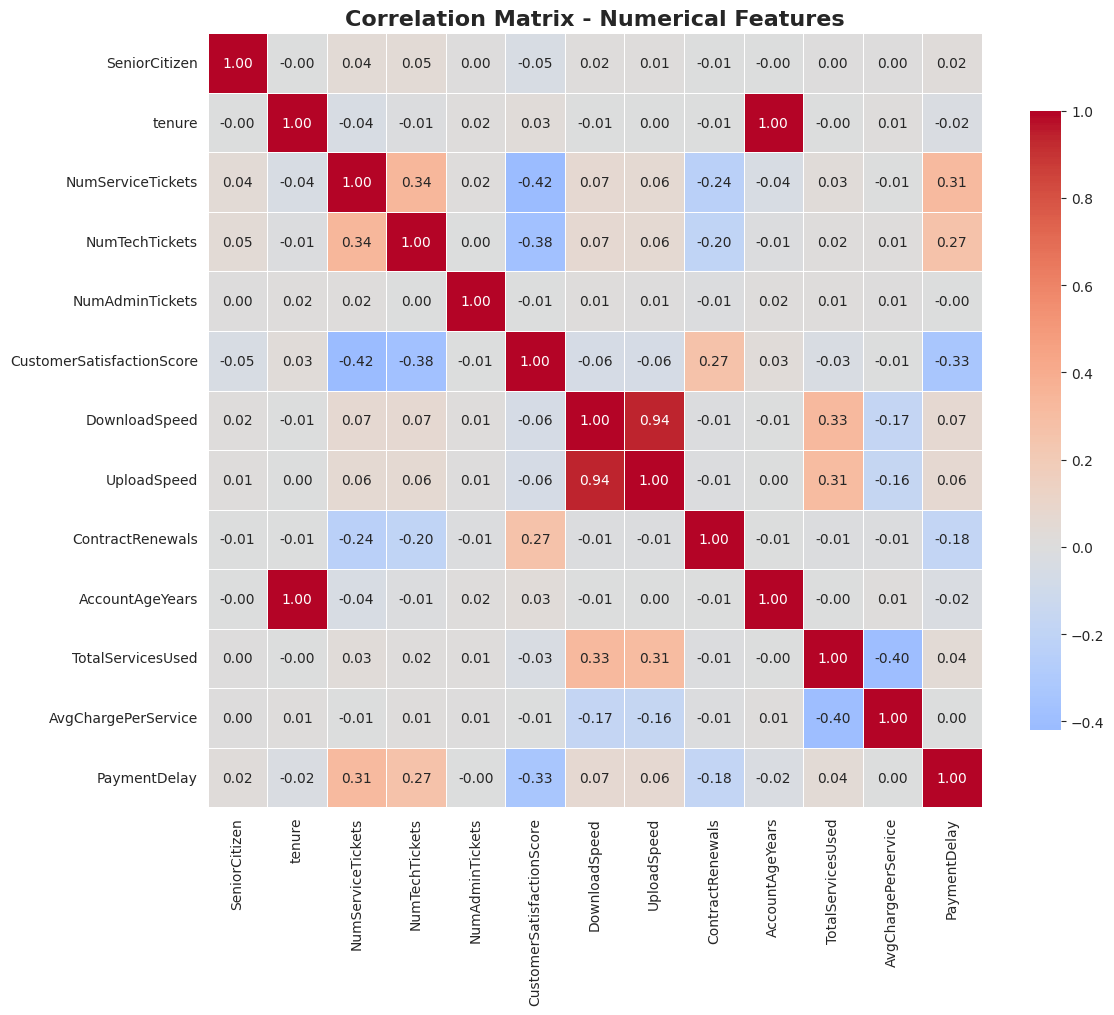

✅ Correlation heatmap saved as 'correlation_heatmap.png'


In [14]:
print("\n" + "=" * 80)
print("BIVARIATE ANALYSIS - CORRELATION MATRIX")
print("=" * 80)

# Calculate correlation matrix for numerical features
numerical_df = df[numerical_cols]
correlation_matrix = numerical_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Correlation heatmap saved as 'correlation_heatmap.png'")

**🎯 Features vs Target Variable**

In [15]:
print("\n" + "=" * 80)
print("BIVARIATE ANALYSIS - FEATURES VS TARGET (CHURN)")
print("=" * 80)

# Analyze numerical features vs Churn
print("\nNumerical Features vs Churn:")
print("="*60)

for col in numerical_cols[:5]:  # First 5 numerical columns
    print(f"\n{col} by Churn:")
    print(df.groupby('Churn')[col].agg(['mean', 'median', 'std']))


BIVARIATE ANALYSIS - FEATURES VS TARGET (CHURN)

Numerical Features vs Churn:

SeniorCitizen by Churn:
           mean  median       std
Churn                            
No     0.141902     0.0  0.348995
Yes    0.181653     0.0  0.385617

tenure by Churn:
            mean  median        std
Churn                              
No     37.482519    38.0  21.017382
Yes    35.420527    35.0  22.647142

NumServiceTickets by Churn:
           mean  median       std
Churn                            
No     2.007712     2.0  1.389429
Yes    4.983046     5.0  2.226503

NumTechTickets by Churn:
           mean  median       std
Churn                            
No     1.518252     1.0  1.233500
Yes    3.472298     3.0  1.813304

NumAdminTickets by Churn:
           mean  median       std
Churn                            
No     0.492031     0.0  0.696066
Yes    0.507417     0.0  0.719960


**📊 Box Plots - Numerical Features vs Churn**

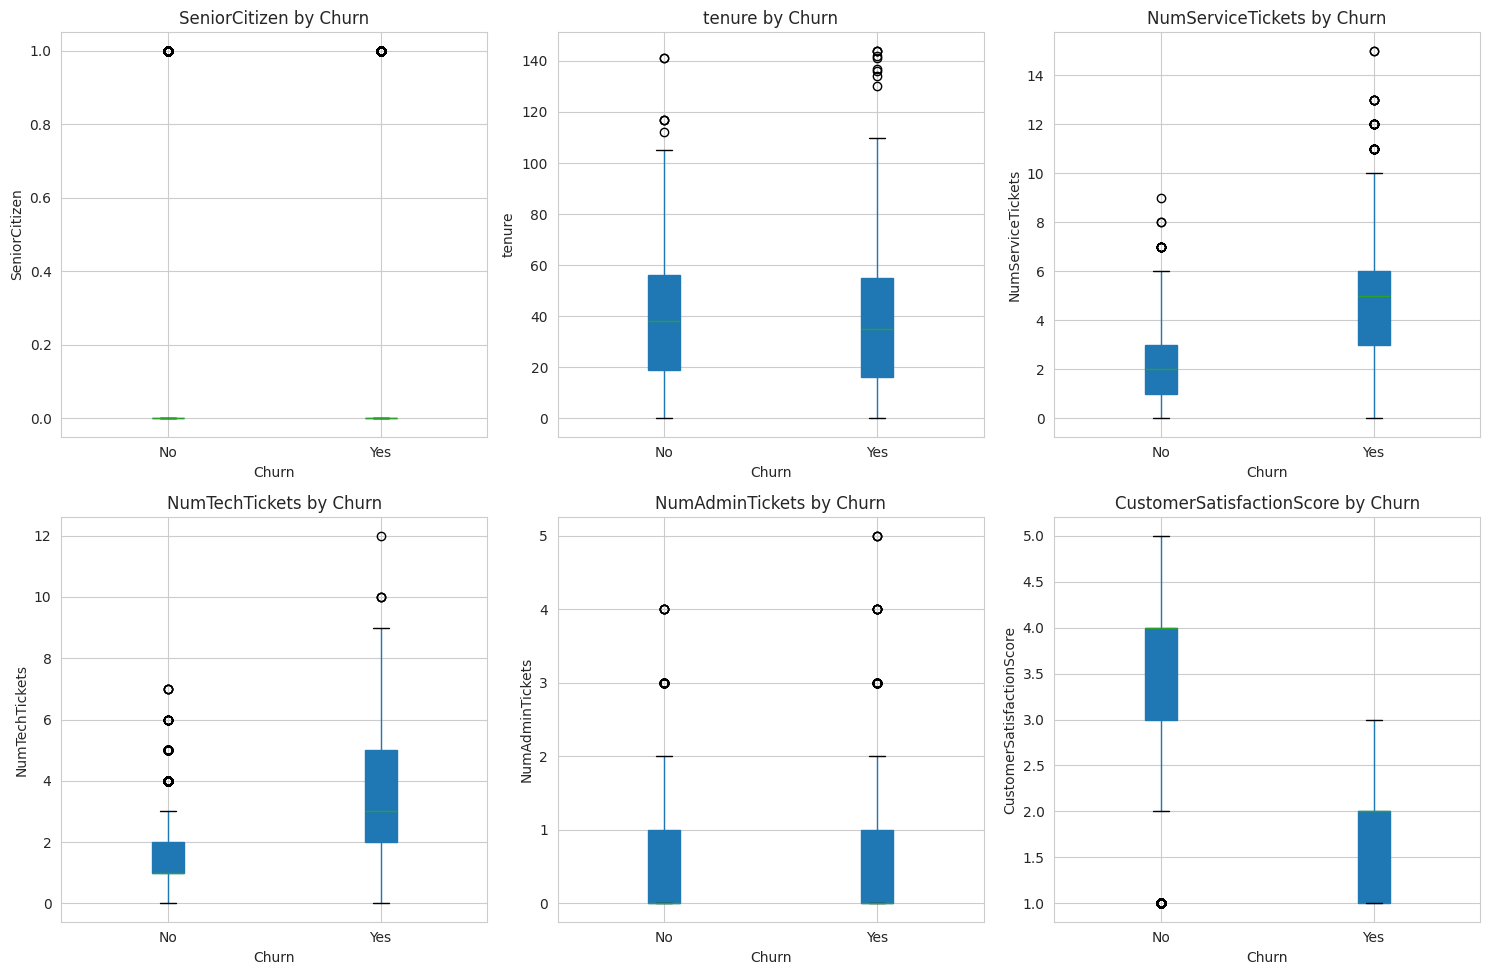

✅ Box plots saved as 'features_vs_churn_boxplots.png'


In [16]:
# Box plots: Numerical features by Churn
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(num_cols_to_plot):
    df.boxplot(column=col, by='Churn', ax=axes[idx], patch_artist=True)
    axes[idx].set_title(f'{col} by Churn')
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(col)
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['No', 'Yes'])

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.savefig('features_vs_churn_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Box plots saved as 'features_vs_churn_boxplots.png'")

💡 **What to look for:**

- **Different distributions** — Feature is likely important for prediction
- **Similar distributions** — Feature may not be very useful


**📊 Categorical Features vs Churn**

In [17]:
# Analyze categorical features vs Churn
print("\n" + "=" * 80)
print("Categorical Features vs Churn:")
print("=" * 80)

for col in categorical_cols[:5]:  # First 5 categorical columns
    print(f"\n{col} vs Churn:")
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    print(ct.round(2))


Categorical Features vs Churn:

customerID vs Churn:
Churn          No    Yes
customerID              
1001-CFO      0.0  100.0
1003-QPY    100.0    0.0
1004-CDS      0.0  100.0
1004-QPY    100.0    0.0
1006-HQI    100.0    0.0
...           ...    ...
9993-OKO    100.0    0.0
9996-VHV      0.0  100.0
9998-OKO    100.0    0.0
9998-QPY    100.0    0.0
9999-HQI      0.0  100.0

[6755 rows x 2 columns]

gender vs Churn:
Churn      No    Yes
gender              
Female  54.92  45.08
Male    53.25  46.75

Partner vs Churn:
Churn       No    Yes
Partner              
No       51.89  48.11
Yes      56.59  43.41

Dependents vs Churn:
Churn          No    Yes
Dependents              
No          52.48  47.52
Yes         57.90  42.10

PhoneService vs Churn:
Churn            No    Yes
PhoneService              
No            54.77  45.23
Yes           54.00  46.00


# **📊 Stacked Bar Charts - Categorical vs Churn**

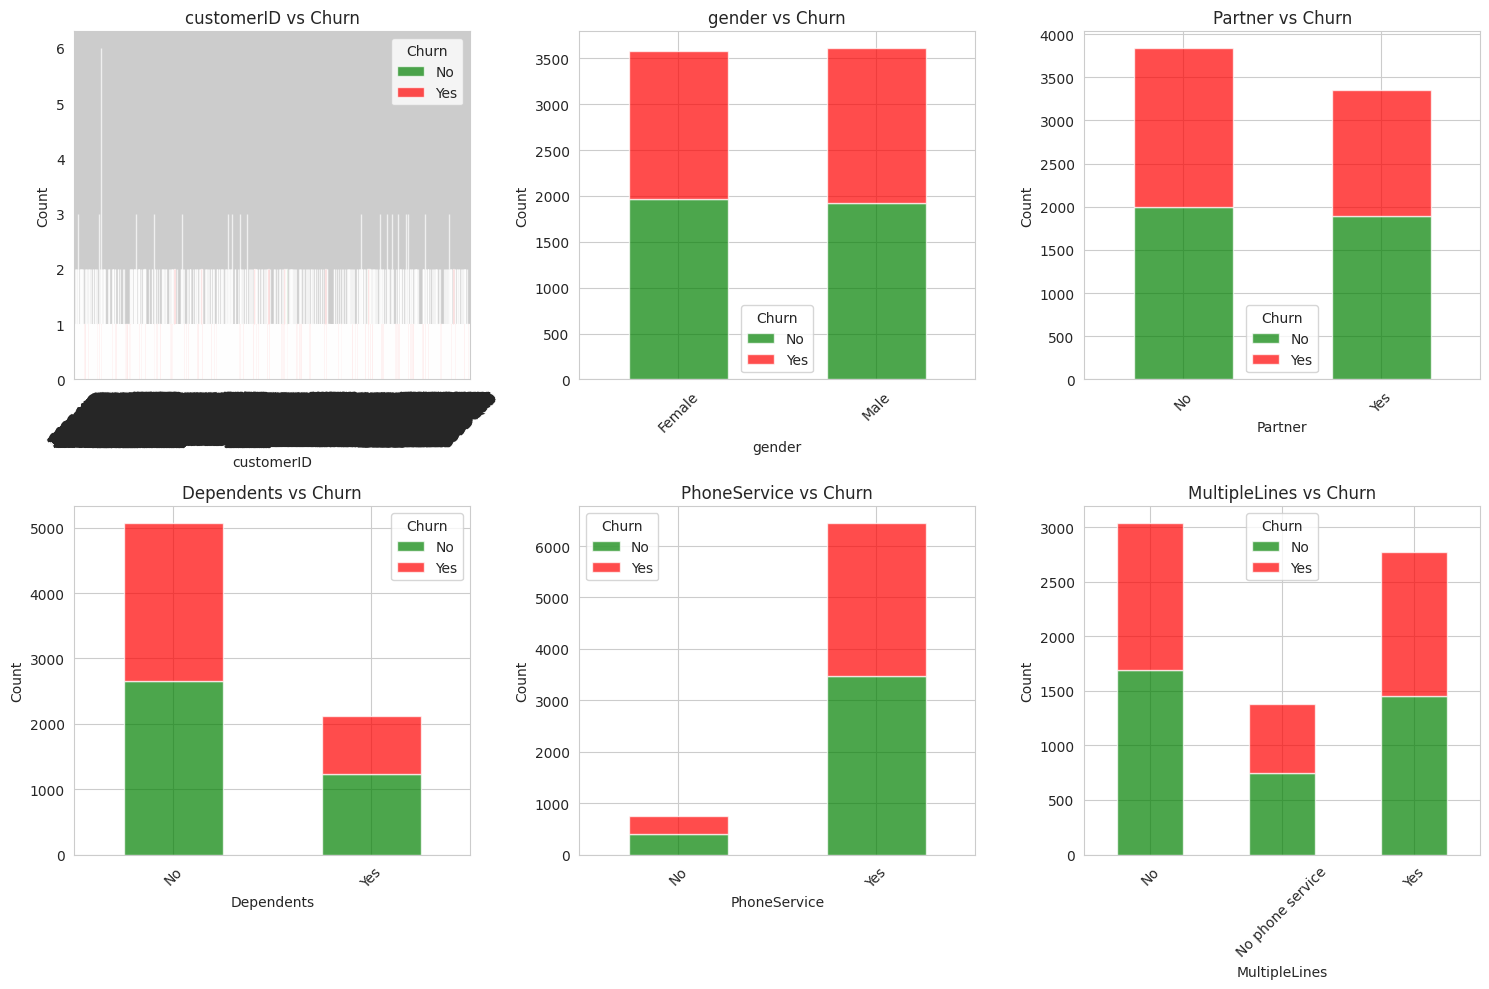

✅ Categorical vs Churn charts saved


In [18]:
# Stacked bar charts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(cat_cols_to_plot):
    # Create crosstab
    ct = pd.crosstab(df[col], df['Churn'])
    ct.plot(kind='bar', stacked=True, ax=axes[idx],
            color=['green', 'red'], alpha=0.7)
    axes[idx].set_title(f'{col} vs Churn')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].legend(title='Churn', labels=['No', 'Yes'])
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('categorical_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Categorical vs Churn charts saved")

# **5. Multivariate Analysis**

**🎨 Pair Plot - Numerical Features**

💡 **What pair plots show:**

- **Diagonal** — Distribution of each feature
- **Off-diagonal** — Relationships between feature pairs
- **Color separation** — How well features separate the target classes



MULTIVARIATE ANALYSIS - PAIR PLOT


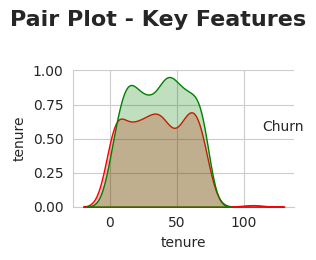

✅ Pair plot saved as 'pairplot.png'


In [19]:
print("\n" + "=" * 80)
print("MULTIVARIATE ANALYSIS - PAIR PLOT")
print("=" * 80)

# Select a few key numerical features for pair plot
key_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

if all(col in df.columns for col in key_features):
    # Create pair plot
    sample_df = df[key_features + ['Churn']].sample(n=min(1000, len(df)), random_state=42)

    sns.pairplot(sample_df, hue='Churn', palette=['green', 'red'],
                 diag_kind='kde', plot_kws={'alpha': 0.6})
    plt.suptitle('Pair Plot - Key Features', y=1.02, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Pair plot saved as 'pairplot.png'")

# **🎯 Feature Relationships with Churn**

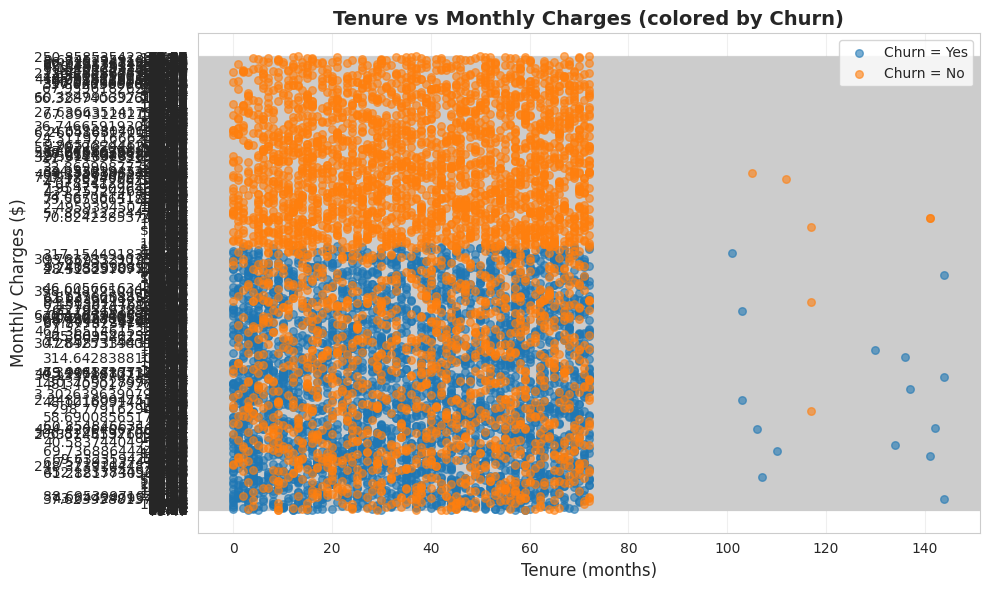

✅ Scatter plot saved


In [20]:
# Scatter plot: Two numerical features colored by Churn
plt.figure(figsize=(10, 6))
for churn_val in df['Churn'].unique():
    mask = df['Churn'] == churn_val
    plt.scatter(df[mask]['tenure'],
                df[mask]['MonthlyCharges'],
                label=f'Churn = {churn_val}',
                alpha=0.6,
                s=30)

plt.xlabel('Tenure (months)', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.title('Tenure vs Monthly Charges (colored by Churn)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('scatter_tenure_vs_charges.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Scatter plot saved")

# **6. Target Variable Analysis**

**🎯 Churn Distribution**

💡 **Churn Rate Interpretation:**

- **< 20%** — Low churn rate (healthy business)
- **20–30%** — Moderate churn (needs attention)
- **> 30%** — High churn (critical issue)



TARGET VARIABLE ANALYSIS - CHURN
Churn Distribution:
  No:  3,890 (54.08%)
  Yes: 3,303 (45.92%)

📊 Churn Rate: 45.92%


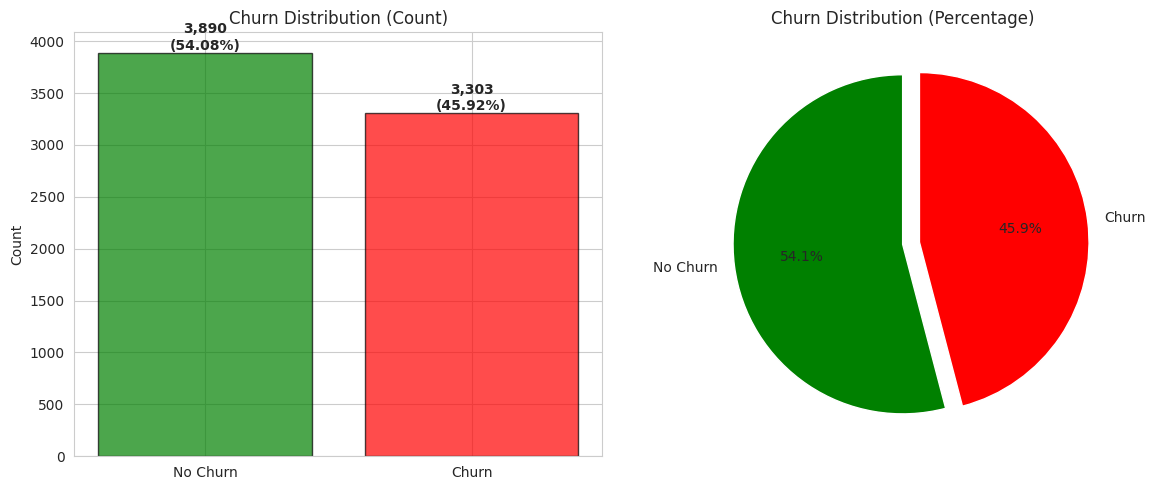

✅ Churn distribution saved


In [21]:
print("\n" + "=" * 80)
print("TARGET VARIABLE ANALYSIS - CHURN")
print("=" * 80)

# Count and percentage
churn_counts = df['Churn'].value_counts()
churn_percentage = (churn_counts / len(df) * 100).round(2)

print("Churn Distribution:")
print(f"  No:  {churn_counts['No']:,} ({churn_percentage['No']}%)")
print(f"  Yes: {churn_counts['Yes']:,} ({churn_percentage['Yes']}%)")

# Calculate churn rate
churn_rate = (churn_counts['Yes'] / len(df)) * 100
print(f"\n📊 Churn Rate: {churn_rate:.2f}%")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
axes[0].bar(['No Churn', 'Churn'], churn_counts.values,
            color=['green', 'red'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Count')
axes[0].set_title('Churn Distribution (Count)')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v, f'{v:,}\n({churn_percentage.values[i]}%)',
                ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(churn_counts.values, labels=['No Churn', 'Churn'],
            autopct='%1.1f%%', colors=['green', 'red'],
            startangle=90, explode=[0, 0.1])
axes[1].set_title('Churn Distribution (Percentage)')

plt.tight_layout()
plt.savefig('churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Churn distribution saved")

# **📋 Summary of EDA Findings**

In [23]:
print("\n" + "=" * 80)
print("EDA SUMMARY")
print("=" * 80)

print(f"""
Dataset Overview:
  • Total Records: {len(df):,}
  • Total Features: {len(df.columns)}
  • Numerical Features: {len(numerical_cols)}
  • Categorical Features: {len(categorical_cols)}

Data Quality:
  • Missing Values: {df.isnull().sum().sum():,}
  • Duplicate Rows: {df.duplicated().sum():,}
  • Duplicate Customer IDs: {df['customerID'].duplicated().sum() if 'customerID' in df.columns else 'N/A'}

Target Variable (Churn):
  • Churn Rate: {churn_rate:.2f}%
  • Class Balance: {'Imbalanced' if churn_rate < 40 or churn_rate > 60 else 'Balanced'}

Key Findings:
  • Features with outliers: [Check box plots]
  • Highly correlated features: [Check correlation matrix]
  • Important features for churn: [Check bivariate analysis]

Next Steps:
  1. Handle missing values
  2. Detect and treat outliers
  3. Fix data type issues
  4. Remove duplicates
  5. Feature engineering
""")

print("=" * 80)
print("✅ EDA COMPLETE! Proceed to Part 2: Data Cleaning")
print("=" * 80)


EDA SUMMARY

Dataset Overview:
  • Total Records: 7,193
  • Total Features: 36
  • Numerical Features: 13
  • Categorical Features: 23

Data Quality:
  • Missing Values: 301
  • Duplicate Rows: 0
  • Duplicate Customer IDs: 438

Target Variable (Churn):
  • Churn Rate: 45.92%
  • Class Balance: Balanced

Key Findings:
  • Features with outliers: [Check box plots]
  • Highly correlated features: [Check correlation matrix]
  • Important features for churn: [Check bivariate analysis]

Next Steps:
  1. Handle missing values
  2. Detect and treat outliers
  3. Fix data type issues
  4. Remove duplicates
  5. Feature engineering

✅ EDA COMPLETE! Proceed to Part 2: Data Cleaning


## 🎓 **Key Takeaways from EDA**

### **What We Learned**
- **Data Structure** — Understood the shape, types, and quality of the data
- **Missing Values** — Identified where data is missing and how much
- **Distributions** — Examined distribution types (normal, skewed, etc.)
- **Outliers** — Spotted unusual values needing investigation
- **Relationships** — Found correlated features and their relation to churn
- **Target Variable** — Understood churn rate and class balance

---

### **Why EDA is Critical**
✅ Helps choose appropriate preprocessing techniques  
✅ Identifies data quality issues early  
✅ Reveals feature importance patterns  
✅ Guides feature engineering decisions  
✅ Informs model selection


In [22]:
# Save key statistics to a file
with open('EDA_Report.txt', 'w') as f:
    f.write("="*80 + "\n")
    f.write("EXPLORATORY DATA ANALYSIS REPORT\n")
    f.write("="*80 + "\n\n")

    f.write(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
    f.write(f"Missing Values: {df.isnull().sum().sum()}\n")
    f.write(f"Duplicate Rows: {df.duplicated().sum()}\n")
    f.write(f"Churn Rate: {churn_rate:.2f}%\n\n")

    f.write("Numerical Features Summary:\n")
    f.write(df[numerical_cols].describe().to_string())
    f.write("\n\n")

    f.write("Missing Values by Column:\n")
    f.write(missing_data.to_string(index=False))

print("✅ EDA report saved as 'EDA_Report.txt'")

✅ EDA report saved as 'EDA_Report.txt'
